<a href="https://colab.research.google.com/github/lcalderon-aceituno24/Bright_Light_Two_Slit_Diffraction/blob/main/Two_Slit_Bright_Light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two-slit Interference with Bright Light Analysis 

Lydia Calderon-Aceituno | September 29, 2020

In this lab, the two-slit interference pattern created by bright light will be observed and analysied. Additionally, interference patterns for single-slit and two-slit scenarios will be measured and slit widths and the wavelength of light will be determined.

# Equipment
* Two-slit interference, one-photon-at-a-time apparatus, TechSpin, TWS 1-A, TWS 325.
* T-shaped viewing card, TechSpin.
* Digital multimeter, FLUKE, 179 TRUE RMS MULTIMETER, 002064.

# Slit-blocker positions


## Transition locations

* Far bar first becomes visible: 3.05 mm
* Near bar first becomes visible: 3.44 mm
* Far bar first blocked: 3.86 mm
* Near bar first blocked: 5.44 mm

* Far slit unblocked: 3.25 mm
* Near slit unblocked: 4.65 mm
* Both slits unblocked: 3.95 mm

**NOTE FOR NEAR SLIT ONLY GRAPH: Due to some error in measurement, the distance for near slit only did not function and there was still interference observed. In order for the near slit only to be uncovered and there to be no interference, the slit blocker distance had to be changed from 4.65mm to 4.90 mm	

In [ ]:
distanceToDetector = 508 # distance from double-slit in mm

# Key landmarks in the interference pattern

Label | Location (mm) | Photodiode Voltage (V)
--- | --- | ---
$\mathrm{B_f}$ |3.88 |0.169
$\mathrm{1_f}$ |4.31 |3.437
$\mathrm{A_f}$ |4.73|0.088
$0$ |5.12|4.092 
$\mathrm{A_n}$ |5.53|0.067
$\mathrm{1_n}$ |5.93|3.430
$\mathrm{B_n}$ |6.35|0.109

### Checks were performed to ensure that the pattern is approximately symmetric around the central maximum. This is verified by checking that the distance from the primary maximum to the secondary maximums are comparable and that the voltages at the secondary maximums are approximately equal (a difference of less than 0.4 V).

In [ ]:
centerLocation = 5.12 # position of central max in mm 

# Load libraries and data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
from google.colab import auth
from oauth2client.client import GoogleCredentials
import gspread
from gspread_dataframe import get_as_dataframe

In [ ]:
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
spreadsheet = gc.open("Two Slit Bright Data")

In [ ]:
df_near = get_as_dataframe(spreadsheet.worksheet("Near Slit Only"), usecols=[0,1],nrows=35)
df_far = get_as_dataframe(spreadsheet.worksheet("Far Slit Only"), usecols=[0,1],nrows=35)
df_both = get_as_dataframe(spreadsheet.worksheet("Both Slits"), usecols=[0,1],nrows=35)

In [ ]:
detectorLocation = df_near['Location (mm)']
V_near = df_near['Photodiode Voltage (V)']
V_far = df_far['Photodiode Voltage (V)']
V_both = df_both['Photodiode Voltage (V)']

In [ ]:
x = detectorLocation - centerLocation

# Single slit diffraction

In [ ]:
def I_ss(x, I0, a, x0):
  wavelength = 0.000670 # 670 nm converted to mm
  q = np.arctan((x-x0)/distanceToDetector)
  return I0*np.sinc(a*np.sin(q)/wavelength)**2
 

In [ ]:
paramGuess = [1.14, 0.1,-0.5]
fitParamFar, fitCovFar = curve_fit(I_ss, x, V_far, p0 = paramGuess)
fitErrorsFar = 2*np.sqrt(np.diagonal(fitCovFar))
print(fitParamFar)
print(fitErrorsFar)

[ 1.17641858  0.10002781 -0.50360461]
[0.00594022 0.00093389 0.01029592]


In [ ]:
paramGuess = [1.07, 0.1,0.6]
fitParamNear, fitCovNear = curve_fit(I_ss, x, V_near, p0 = paramGuess)
fitErrorsNear = 2*np.sqrt(np.diagonal(fitCovNear))
print(fitParamNear)
print(fitErrorsNear)

[1.06347146 0.1045432  0.45392163]
[0.00982592 0.00165566 0.01668012]


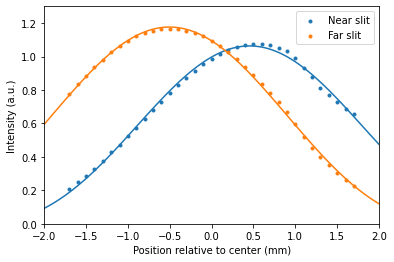

In [ ]:
fig_ss, ax_ss = plt.subplots();
ax_ss.scatter(x, V_near, marker='.', label="Near slit");
ax_ss.scatter(x, V_far, marker='.', label="Far slit");
ax_ss.set_xlabel("Position relative to center (mm)");
ax_ss.set_ylabel("Intensity (a.u.)");
ax_ss.legend();
x_fit = np.linspace(-2, 2, 100);
ax_ss.plot(x_fit, I_ss(x_fit, *fitParamNear));
ax_ss.plot(x_fit, I_ss(x_fit, *fitParamFar));
ax_ss.set_xlim(-2, +2);
ax_ss.set_ylim(0, 1.3);

In [ ]:
a_near = fitParamNear[1]
a_far = fitParamFar[1]
slitPercentDiff = 100*(a_near-a_far)/(0.5*(a_near+a_far))
print(slitPercentDiff)

4.414490713090644


In [ ]:
I_ss_near = fitParamNear[1]
I_ss_far = fitParamFar[1]
intensityPercentDiff = 100*(I_ss_near-I_ss_far)/(0.5*(I_ss_near+I_ss_far))
print(intensityPercentDiff)

4.414490713090644


## Fits results
### Far slit
* $I_0 = 1.176 \pm 0.006$
* $a = (0.1000 \pm 0.0009 )\ \mathrm{mm}$
* $x_0 = (-0.50 \pm 0.01)\ \mathrm{mm}$
* The 95% confidence interval for the slit width is 0.0991 to 0.1009 mm.
### Near slit
* $I_0 = 1.073 \pm 0.010$  
* $a = (0.105 \pm 0.002)\ \mathrm{mm}$
* $x_0 = (0.45 \pm 0.02)\ \mathrm{mm}$
* The 95% confidence interval for the slit width is 0.103 to 0.107 mm.
### Comparison
* The slit width confidence intervals do overlap.
* The slit widths differ by 4.41%.
* The intensities differ by 4.41%.

# Two-slit interference

In [ ]:
def I_ts(x, I0, a, wavelength, x0, dI):
  d = 0.406 # mm
  q = np.arctan((x-x0)/distanceToDetector)
  I2s = I0*np.sinc(a*np.sin(q)/wavelength)**2*np.cos(np.pi*d*np.sin(q)/wavelength)**2
  return I2s + dI

In [ ]:
paramGuess = [4.06, 0.1,0.000670,0.0,0.09]
fitParamBoth, fitCovBoth = curve_fit(I_ts,x,V_both,p0 = paramGuess)
fitErrorsBoth = 2*np.sqrt(np.diagonal(fitCovBoth))
print(fitParamBoth)
print(fitErrorsBoth)


[3.99931869e+00 9.85219703e-02 6.55232902e-04 1.98477887e-02
 1.07969697e-01]
[7.86593509e-02 2.23419992e-03 2.25750475e-06 2.61092862e-03
 3.97260146e-02]


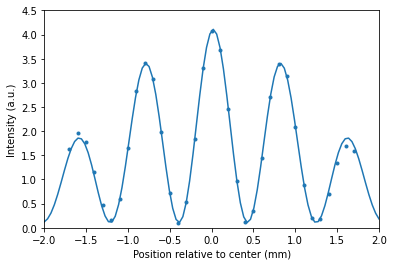

In [ ]:
fig_ts, ax_ts = plt.subplots();
ax_ts.scatter(x, V_both, marker='.', label="Both slits");
ax_ts.set_xlabel("Position relative to center (mm)");
ax_ts.set_ylabel("Intensity (a.u.)");
x_fit = np.linspace(-2, 2, 100);
ax_ts.plot(x_fit, I_ts(x_fit,*fitParamBoth));
ax_ts.set_xlim(-2, 2);
ax_ts.set_ylim(0, 4.5);

## Fits results
### Both slits
* $I_0 = 4.00 \pm 0.08$
* $a = (0.100 \pm 0.002)\ \mathrm{mm}$
* $\lambda = (655 \pm 2)\ \mathrm{nm}$
* $x_0 = (0.020 \pm 0.003)\ \mathrm{mm}$
* The 95% confidence interval for the slit width is 0.008 to 0.012 mm.
* The 95% confidence interval for the wavelength is 653 to 658 nm.

The laser specifications were that its wavelength was between 665 and 675 nm. The calculated 95% confidence interval for the wavelength is 653 to 658 nm so this falls inside the specified range.
The manufacturer's specifications were that the slit width was 0.1 mm. The calculated 95% confidence interval for the slit width is 0.098 to 0.102 mm so this falls inside of the specified range. 